# PySCF

Autor: [Prof. Elvis do A. Soares](https://github.com/elvissoares) 

Contato: [elvis@peq.coppe.ufrj.br](mailto:elvis@peq.coppe.ufrj.br) - [Programa de Engenharia Química, PEQ/COPPE, UFRJ, Brasil](https://www.peq.coppe.ufrj.br/)

---

## Instalação 

```[bash]
pip install pyscf
```

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, cc

# import scienceplots
# plt.style.use(['notebook'])

## Introdução

Construindo a molécula de H2 usando base STO-3G

In [11]:
mol = gto.Mole()
mol.build(
    atom = [['H',(0, 0, 0)], ['H',(1, 0, 0)]],
    basis = 'sto-3g')

Resolvendo SCF

In [12]:
mf = scf.RHF(mol).run()

converged SCF energy = -1.06610864931794


Usando a base 6-31g

In [13]:
mol = gto.Mole()
mol.build(
    atom = [['H',(0, 0, 0)], ['H',(1, 0, 0)]],
    basis = '6-31g')

Resolvendo SCF

In [14]:
mf = scf.RHF(mol).run()

converged SCF energy = -1.09480796286051


In [16]:
mf.e_tot

np.float64(-1.0948079628605116)

Usando um método pós-HF de Coupled-Cluster (CC)

In [15]:
mycc = cc.CCSD(mf).run()
print('CCSD total energy', mycc.e_tot)
et = mycc.ccsd_t()
print('CCSD(T) total energy', mycc.e_tot + et)

E(CCSD) = -1.126778370572369  E_corr = -0.03197040771185721
CCSD total energy -1.1267783705723688
CCSD(T) correction = -2.23646341719082e-19
CCSD(T) total energy -1.1267783705723688


## Otimizando Geometria de H2

In [ ]:
mol = gto.Mole()

Rarray = np.arange(0.5, 5.0, 0.1)
Earray = np.zeros_like(Rarray)

for i, R in enumerate(Rarray):
    
    mol.build(
        atom = [['H',(0, 0, 0)], ['H',(R, 0, 0)]],
        basis = '6-31g', unit='B', verbose=0)
    
    mf = scf.HF(mol)
    Earray[i] = mf.scf()

(0.5, 5.0)

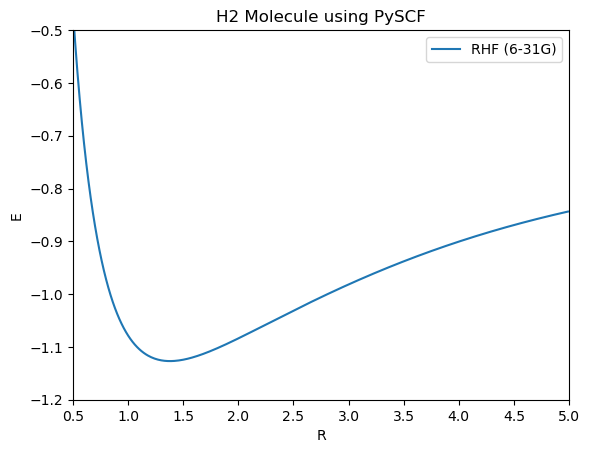

In [86]:
plt.plot(Rarray, Earray, label = 'RHF (6-31G)')
plt.legend(loc='upper right')
plt.xlabel('R')
plt.ylabel('E') 
plt.title('H2 Molecule using PySCF')

plt.ylim(-1.2,-0.5)
plt.xlim(0.5, 5.0)

Fitting da energia

In [ ]:
from scipy.optimize import curve_fit

def func(x, k, D0, x0):
    return k * (x-x0)**2 - D0

popt, pcov = curve_fit(func, Rarray[(Rarray < 0.5)], Earray[50:100], p0=[0.1,1.1,1.5])

Achando mínimo a partir do array

In [ ]:
Estar = Earray.min()
Rstar = Rarray[Earray.argmin()]

Text(0.5, 1.0, 'H2 Molecule using PySCF')

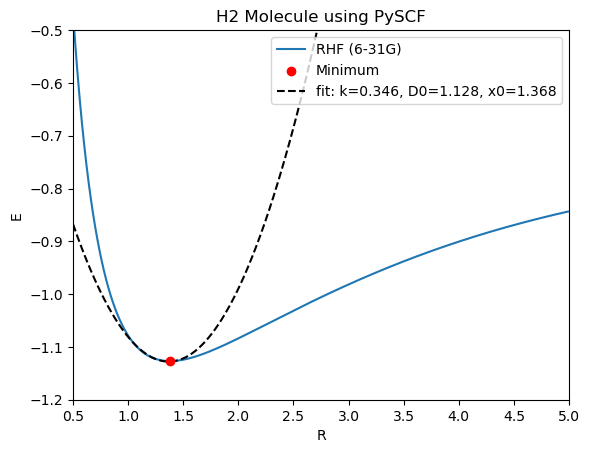

In [105]:
plt.plot(Rarray, Earray, label = 'RHF (6-31G)')
plt.scatter(Rstar, Estar, color='red', label='Minimum', zorder=5)
plt.plot(Rarray, func(Rarray, *popt), 'k--',
         label='fit: k=%5.3f, D0=%5.3f, x0=%5.3f' % tuple(popt))
plt.ylim(-1.2,-0.5)
plt.xlim(0.5, 5.0)
plt.legend(loc='upper right')
plt.xlabel('R')
plt.ylabel('E') 
plt.title('H2 Molecule using PySCF')

## H2O molecule

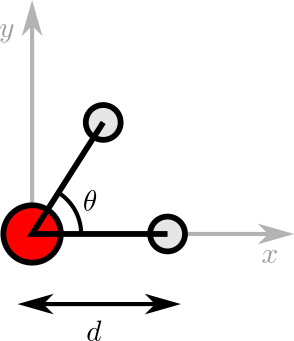

In [143]:
d0 = 1.733 # a.u (Experimental value)

theta0 = 104.5 # degrees (Experimental value)
theta0 = np.radians(theta0) # convert to radians

print('d0 =', d0, ' u.a.')
print('theta0 =', theta0, ' radians')

H2Omol = gto.Mole()
H2Omol.build(
    atom = [['O',(0, 0, 0)],['H',(d0, 0, 0)], ['H',(d0*np.cos(theta0), d0*np.sin(theta0), 0)]],
    basis = '6-31g**', unit='B', verbose=0)

d0 = 1.733  u.a.
theta0 = 1.8238690683340744  radians


Energia da molécula

In [144]:
mf = scf.HF(H2Omol)
mf.scf()

np.float64(-76.02140073437417)

Energia como função da distância de ligação $H-O$

Energia como função do ângulo de ligação $H-O-H$